<a href="https://colab.research.google.com/github/zack-dark/Cats-DogsClassification/blob/main/GrpMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Hnaya telechargit dataset mn kaggle li fiha les images ou ghadi n extractiha

!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2022-11-08 12:08:06--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 184.85.75.144, 2600:1406:3c:3a4::317f, 2600:1406:3c:393::317f
Connecting to download.microsoft.com (download.microsoft.com)|184.85.75.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  68.1MB/s    in 15s     

2022-11-08 12:08:21 (53.4 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [ ]:
!unzip kagglecatsanddogs_5340.zip


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflatin

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras_preprocessing.image import load_img 
import random
import os



In [ ]:
## hnaya ghadi n9ad dataframe diali , ghadi n representer cats homa 0 et dogs homa 1
path_img=[] # hadi pour stocker chemin dial kola image
label=[] # ou hadi ghadi ikon fiha 1 oula 0 (i.e cat or dog)

for pet in os.listdir("PetImages"): ## PetImages ou dossier li tgenera lia mli extractit dik dataset , ghadi tal9awh f les dossiers dial google coolab
  for path in os.listdir("PetImages/"+pet):
    if pet=="Cat":
      label.append(0)
    else:
      label.append(1)

    path_img.append(os.path.join("PetImages",pet,path))
print(path_img[:5],label[:5])  

df =pd.DataFrame()  # douk 2 dial les listes li 9adit path_img et label ghadi ndirhome daba f dataframe
df['images']=path_img
df['label']=label
df=df.sample(frac=1).reset_index(drop=True)# hnaya bach ndir shuffle l data 
df.head() # kan afficher les 5 premier ligne mn dataframe
# print(df[df['label']==1].shape)
# print(df[df['label']==0].shape)
# print(df.shape)


['PetImages/Dog/2386.jpg', 'PetImages/Dog/1187.jpg', 'PetImages/Dog/2660.jpg', 'PetImages/Dog/3129.jpg', 'PetImages/Dog/4879.jpg'] [1, 1, 1, 1, 1]


,images,label
0,PetImages/Dog/6244.jpg,1
1,PetImages/Cat/4075.jpg,0
2,PetImages/Dog/1573.jpg,1
3,PetImages/Cat/10546.jpg,0
4,PetImages/Cat/5576.jpg,0


In [ ]:
import PIL
l = []
for image in df['images']:
  try:
    img = PIL.Image.open(image)
  except:
    l.append(image)
l

[]

In [ ]:
#suppression db files
for i in df['images']:
  if '.jpg' not in i:
    print(i)

df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Dog/11702.jpg']
df = df[df['images']!='PetImages/Cat/666.jpg']
len(df)

24998

In [ ]:
#analyse des images dogs
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0,len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title("dogs")
  plt.axis('off')

<Figure size 1800x1800 with 0 Axes>

In [ ]:
#analyse des images cats
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0,len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title("cats")
  plt.axis('off')

<Figure size 1800x1800 with 0 Axes>

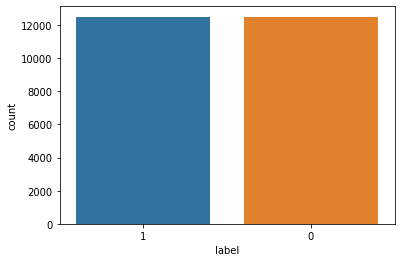

In [ ]:
import seaborn as sns 
sns.countplot(df['label'])

In [ ]:
df['label']=df['label'].astype('str')

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size=0.2,random_state=42)
test.head()

,images,label
6870,PetImages/Cat/11530.jpg,0
22914,PetImages/Dog/8362.jpg,1
9671,PetImages/Dog/8435.jpg,1
13641,PetImages/Cat/3278.jpg,0
23341,PetImages/Cat/7343.jpg,0


In [ ]:
# creation du datagenerator pour les images
from keras_preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255, # normalisation des images
    rotation_range = 40, #augmentation of images to avoid overfitting
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_generator= ImageDataGenerator(rescale=1./255)


train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
    )


val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
    )





Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
#creation du model
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
    Conv2D(16,(3,3),activation='relu', input_shape=(128,128,3)),
    MaxPool2D((2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1,activation='sigmoid')
])



In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 28800)             0         
                                                                 
 dense_4 (Dense)             (None, 512)              

In [ ]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
40/40 [==============================] - 435s 11s/step - loss: 0.6702 - accuracy: 0.5664 - val_loss: 0.6481 - val_accuracy: 0.6136
Epoch 2/10
40/40 [==============================] - 386s 10s/step - loss: 0.6173 - accuracy: 0.6579 - val_loss: 0.6051 - val_accuracy: 0.6676
Epoch 3/10
40/40 [==============================] - 381s 9s/step - loss: 0.5853 - accuracy: 0.6898 - val_loss: 0.5778 - val_accuracy: 0.6952
Epoch 4/10
40/40 [==============================] - 386s 10s/step - loss: 0.5693 - accuracy: 0.7046 - val_loss: 0.5510 - val_accuracy: 0.7220
Epoch 5/10
40/40 [==============================] - 380s 9s/step - loss: 0.5660 - accuracy: 0.7077 - val_loss: 0.5463 - val_accuracy: 0.7246
Epoch 6/10
40/40 [==============================] - 377s 9s/step - loss: 0.5481 - accuracy: 0.7209 - val_loss: 0.5654 - val_accuracy: 0.7144
Epoch 7/10
40/40 [==============================] - 381s 9s/step - loss: 0.5460 - accuracy: 0.7230 - val_loss: 0.5261 - val_accuracy: 0.7344
Epoch 8/10

<Figure size 432x288 with 0 Axes>

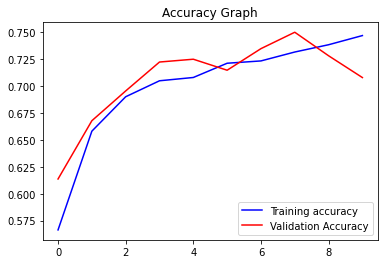

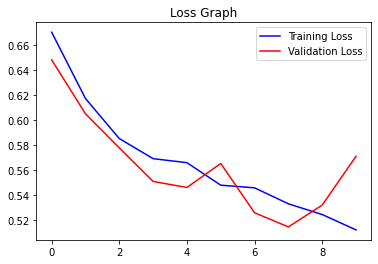

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()



loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.figure()

